In [231]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

import cmbo
from IPython.display import display

from plot_cluster import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
fname_cmb = "/Users/rstiskalek/Projects/CMBOlympics/data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits"
cmb_tsz = cmbo.io.read_Planck_comptonSZ(fname_cmb)
cmb_tsz = cmbo.utils.smooth_map_gaussian(cmb_tsz, fwhm_arcmin=9.6, )


fname_clusters = "/Users/rstiskalek/Projects/CMBOlympics/data/observed_cluster_masses.toml"
obs_clusters = cmbo.io.load_observed_clusters(fname_clusters)

fname_rand_pointing = "/Users/rstiskalek/Projects/CMBOlympics/data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00_RAND_POINTING.hdf5"
theta_rand, tsz_rand_signal, theta_rand_bg, tsz_rand_background = cmbo.io.read_from_hdf5(
    fname_rand_pointing, "theta_rand", "tsz_rand_signal", "theta_rand_bg", "tsz_rand_background",)

In [235]:
fname = "../data/csiborg2_fof.hdf5"


# optional_keys = ["R200c", ]
optional_keys = ["Group_R_Crit200", ]

positions, masses, optional_data = cmbo.io.load_halo_positions_masses(
    fname, "Coordinates", "Group_M_Crit200", optional_keys=optional_keys)

# positions, masses, optional_data = cmbo.io.load_halo_positions_masses(
    # fname, "Position", "M200c", optional_keys=optional_keys)

# boxsize = 677.7
boxsize = 676.6

associations = cmbo.utils.identify_halo_associations(positions, masses, optional_data=optional_data)
pval, dist = cmbo.utils.compute_matching_matrix(obs_clusters, associations, boxsize)
matches = cmbo.utils.greedy_global_matching(pval, dist, obs_clusters, associations, 0.99)

100%|██████████| 358/358 [00:02<00:00, 170.86it/s]

Perseus (A426): min p-value = 9.167e-01


In [236]:
profiler = cmbo.corr.PointingEnclosedProfile(cmb_tsz, fwhm_arcmin=9.6)
profiler2d = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)

In [237]:
ell, b = 127.01830304998882, -63.37780827890151
# ell, b = 150.5762830811112, 2.3122019762010

profiler.get_profile(ell, b, 60, 60)

(1.0463307149125224e-06, 1.4134095915582903e-06)

In [238]:
ell_found, b_found, res, cutout, ext = profiler2d.find_center(
    127.01830304998882, -63.37780827890151,
    shrink_factor=0.9, max_iterations=1000)

Iteration 0: radius = 169.71 arcmin, offset = (-8.124, -18.867), r = 20.542 arcmin
Iteration 1: radius = 152.74 arcmin, offset = (-4.984, -8.544), r = 9.891 arcmin
Iteration 2: radius = 137.46 arcmin, offset = (-3.655, -3.468), r = 5.039 arcmin
Iteration 3: radius = 123.72 arcmin, offset = (-3.681, -1.663), r = 4.040 arcmin
Iteration 4: radius = 111.34 arcmin, offset = (-3.300, -2.463), r = 4.117 arcmin
Iteration 5: radius = 100.21 arcmin, offset = (-4.705, -2.969), r = 5.563 arcmin
Iteration 6: radius = 90.19 arcmin, offset = (-5.377, -1.849), r = 5.686 arcmin
Iteration 7: radius = 81.17 arcmin, offset = (-1.724, -0.562), r = 1.813 arcmin
Iteration 8: radius = 73.05 arcmin, offset = (0.148, -0.367), r = 0.396 arcmin
Iteration 9: radius = 65.75 arcmin, offset = (0.410, 0.002), r = 0.410 arcmin
Iteration 10: radius = 59.17 arcmin, offset = (0.665, -0.081), r = 0.670 arcmin
Iteration 11: radius = 53.26 arcmin, offset = (0.517, -0.539), r = 0.747 arcmin
Iteration 12: radius = 47.93 arcmin

In [239]:
theta = np.linspace(0.1, 100, 100)
y, ybg = profiler.get_profile(ell_found, b_found, theta)

In [240]:
k = np.argmin(np.abs(theta - 50))

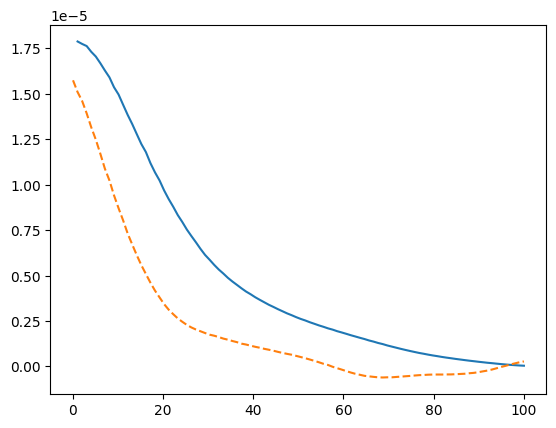

In [241]:
plt.figure()
plt.plot(theta, y - ybg[k])
plt.plot(theta, ybg, linestyle="--")
plt.show()

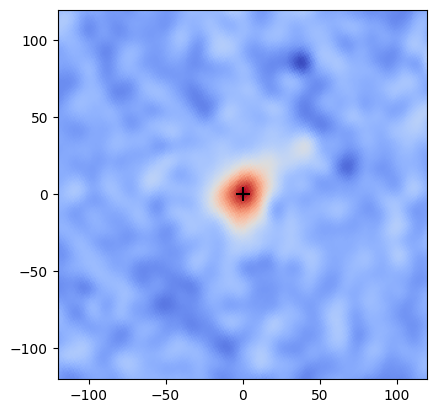

In [243]:
plt.figure()
plt.imshow(cutout, origin="lower", extent=ext, cmap="coolwarm")
plt.scatter([0], [0], c="black", marker="+", s=100)
plt.show()

In [244]:
obs_clusters.names

['Abell 1644',
 'Abell 119',
 'Abell 548',
 'Abell 1736',
 'Abell 496',
 'Hydra (A1060)',
 'Centaurus (A3526)',
 'Hercules (A2199)',
 'Hercules (A2147)',
 'Hercules (A2063)',
 'Hercules (A2151)',
 'Leo (A1367)',
 'Coma (A1656)',
 'Norma (A3627)',
 'Virgo Cluster',
 'Shapley (A3571)',
 'Shapley (A3558)',
 'Shapley (A3562)',
 'Perseus (A426)']

In [249]:
k = 12

print(obs_clusters.names[k])

assoc, min_pval, d = matches[k]

print(f"p-value: {min_pval:.3e}, distance: {d:.2f} Mpc")

obs_pos = np.full((3,), 676.6 / 2)
r, ell, b = assoc.to_galactic_angular(obs_pos)
rc, ellc, bc = assoc.centroid_to_galactic_angular(obs_pos)
# theta200 = np.rad2deg(np.atan(assoc.optional_data["R200c"] / r)) * 60
theta200 = np.rad2deg(np.atan(assoc.optional_data["Group_R_Crit200"] / r)) * 60


Coma (A1656)
p-value: 8.782e-05, distance: 3.28 Mpc


In [250]:
np.log10(assoc.masses)

array([14.96177918, 14.9730185 , 14.98287588, 14.98039075, 14.9599935 ,
       14.95319828, 14.97345281, 14.941594  , 15.06290392, 15.07630466,
       15.04863182, 15.09494935, 15.0061391 , 14.98741028, 15.00443613,
       14.97868291, 15.0799358 , 15.0064962 , 14.97699833, 14.99145543])

In [251]:
cutout_gen = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)

size_arcmin = 180

cut, ext = cutout_gen.get_cutout_2d(ell_deg=ellc, b_deg=bc, size_arcmin=size_arcmin)

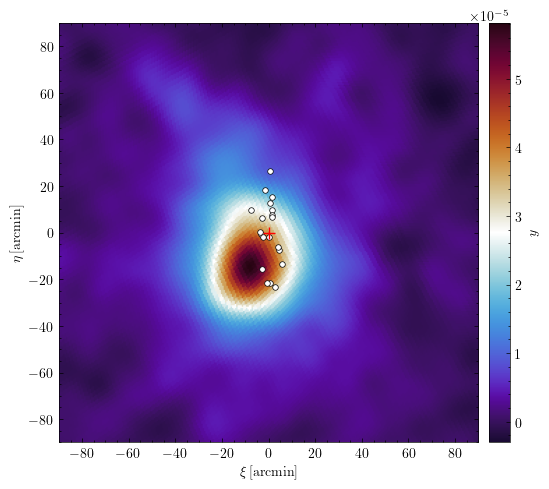

In [252]:
fig, ax = plot_cluster_cutout(cut, ext, ell, b, ellc, bc)

fig.savefig(f"cluster_{obs_clusters.names[k].replace(' ', '_')}.png", dpi=300)

display(fig)
plt.close("all")

In [268]:
profiler = cmbo.corr.PointingEnclosedProfile(cmb_tsz, )

In [269]:
cmbo.utils.compute_association_signals(
    associations, profiler, obs_pos, theta_rand, tsz_rand_signal, theta_rand_bg, tsz_rand_background,
    background_radius_norm=1.25)

Computing association signals: 100%|██████████| 358/358 [01:32<00:00,  3.88it/s]


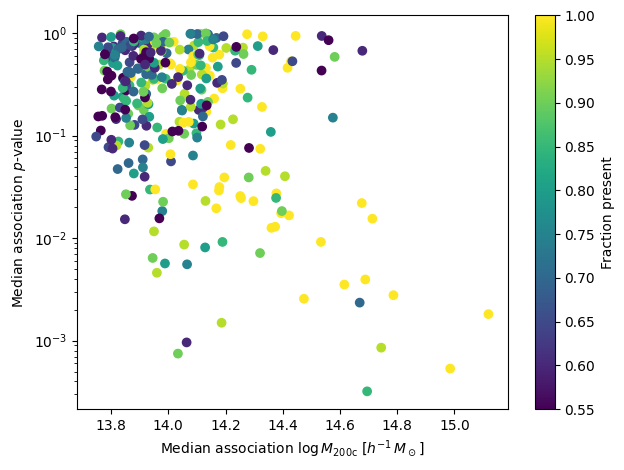

In [273]:
x = np.asanyarray([np.log10(np.median(assoc.masses)) for assoc in associations])
y = np.asanyarray([assoc.median_pval for assoc in associations])
f = np.asanyarray([assoc.fraction_present for assoc in associations])


mask_f = f > 0.5

plt.figure()
plt.scatter(x[mask_f], y[mask_f], c=f[mask_f], cmap="viridis")
plt.colorbar(label="Fraction present")
plt.xlabel(r"Median association $\log M_\mathrm{200c} ~ [h^{-1}\,M_\odot]$")
plt.ylabel("Median association $p$-value")
plt.yscale("log")
plt.tight_layout()

plt.savefig("/Users/rstiskalek/Downloads/association_plot.png", dpi=300)

plt.show()